<a href="https://colab.research.google.com/github/paolofullone/DS_Paolo/blob/main/reconhecimento_facial_facenet_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science do Zero - Visão Computacional e Deep Learning

#### Importando as bibliotecas necessárias

In [1]:
#!pip3 install mtcnn

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

from imageio import imread
from skimage.transform import resize
from scipy.spatial import distance
from keras.models import load_model
from sklearn.preprocessing import Normalizer

from mtcnn.mtcnn import MTCNN

%matplotlib inline

#### Inicializando variáveis

In [3]:
#image_dir_basepath = 'lfw/train/'
#names = ['Luiz_Inacio_Lula_da_Silva', 'Angelina_Jolie', 'Bill_Gates','George_W_Bush','Michael_Jordan']
# http://vis-www.cs.umass.edu/lfw => complete photos

image_dir_basepath = '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/'
names = ['Aaron_Peirsol', 'Adam_Sandler', 'Aicha_El_Ouafi','Abel_Pacheco','Madonna']
image_size = 160

#### Carregando as imagens

In [4]:
names

['Aaron_Peirsol', 'Adam_Sandler', 'Aicha_El_Ouafi', 'Abel_Pacheco', 'Madonna']

In [5]:
image_filepaths = []
for name in names:
    image_dirpath = image_dir_basepath + name
    
    for f in os.listdir(image_dirpath):
        image_filepaths.append(os.path.join(image_dirpath, f))

In [6]:
image_filepaths

['/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Aaron_Peirsol/Aaron_Peirsol_0001.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Adam_Sandler/Adam_Sandler_0001.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Aicha_El_Ouafi/Aicha_El_Ouafi_0001.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Abel_Pacheco/Abel_Pacheco_0001.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Madonna/Madonna_0003.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Madonna/Madonna_0001.jpg',
 '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Madonna/

#### Visualizando as imagens selecionadas

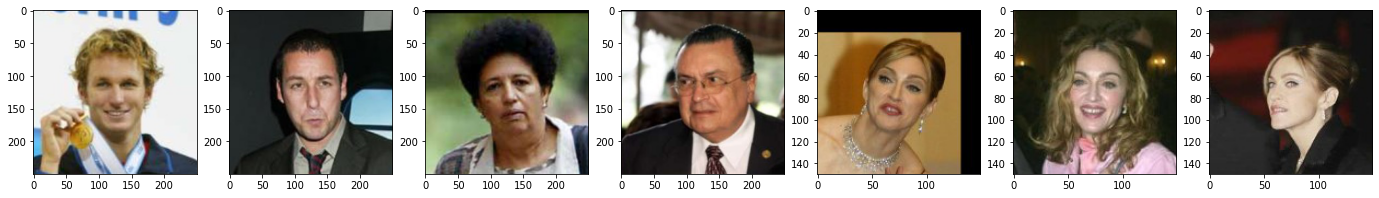

In [7]:
fig, axes = plt.subplots(1, len(image_filepaths), figsize=(24, 24))
i = 0
for item in image_filepaths:
    axes[i].imshow(imread(item))
    i+=1
plt.show()

#### Carregando o modelo do Facenet, este modelo foi disponibilizado pela facenet no formato keras, não precisamos implementar o facenet e podemos usar um modelo que já foi treinado com milhões de imagens.

In [8]:
model_path = '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/model/facenet_keras.h5'
model = load_model(model_path)

#### Carregando o modelo MTCNN para detecção de faces

In [9]:
detector = MTCNN()

#### Faces Detectadas

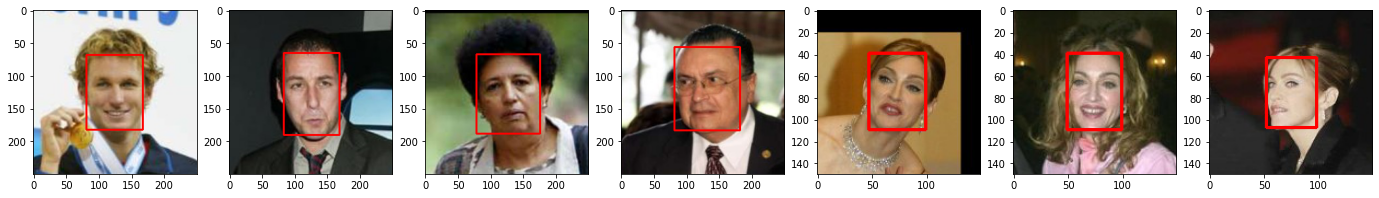

In [10]:
fig, axes = plt.subplots(1, len(image_filepaths), figsize=(24, 24))

i = 0
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0:
        (x, y, w, h) = faces[0]['box']
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
        axes[i].imshow(img)
        i+=1

plt.show()

#### Realizando o Crop e Resize nas imagens.

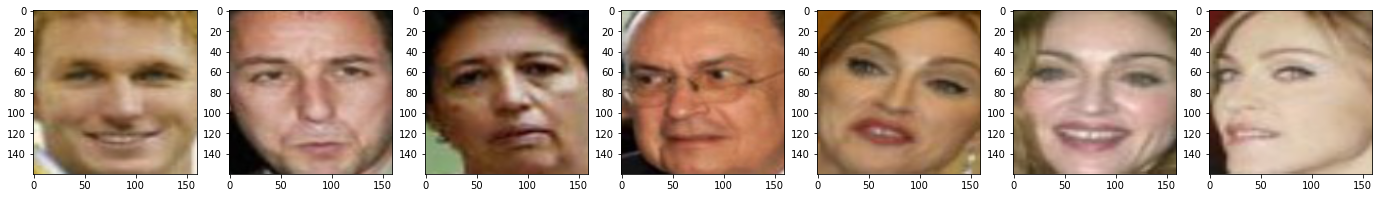

In [11]:
fig, axes = plt.subplots(1, len(image_filepaths), figsize=(24, 24))

i = 0
imgs_faces = []
for filepath in image_filepaths:
    img = imread(filepath)
    faces = detector.detect_faces(img)
    
    if len(faces)>0:
        (x, y, w, h) = faces[0]['box']
        img = img[y:y+h,x:x+w,:]
        img_resized = resize(img, (image_size, image_size), mode='reflect')
        imgs_faces.append(img_resized)
        axes[i].imshow(img_resized)
        i+=1

plt.show()

#### Calculando os Embbedings.

In [12]:
imgs_faces = np.array(imgs_faces)
embs = []
for n in range(0, len(imgs_faces), 1):
    embs.append(model.predict_on_batch(imgs_faces[n:n+1]))

#### Verificando os Embbedings.

In [13]:
print(embs)

[array([[ 0.20322603, -1.329935  , -1.1649243 ,  1.018002  , -0.32048365,
        -0.09067378,  0.03330657, -0.809225  , -0.23160094, -0.06336452,
         0.3139462 , -0.33634073, -0.2531822 , -0.2368111 , -0.99999833,
        -1.7376505 , -1.0229908 , -0.30849725, -1.1357654 ,  0.08564956,
        -0.03446952, -0.92465925,  1.3780557 , -3.0535645 ,  1.6409137 ,
        -0.42361408,  0.15405037, -0.38287598, -0.38192856,  2.3912654 ,
         0.15401751, -0.65552163, -1.085874  ,  0.22131452, -0.34161642,
         1.3518727 , -0.526649  ,  0.60164773,  0.2663601 , -1.8781313 ,
         0.59239405,  1.0307281 , -1.0814241 , -0.1512843 ,  0.98333246,
        -0.36208767,  0.39161512,  1.3589369 , -1.6962447 ,  1.100813  ,
        -0.7299835 , -1.076262  ,  1.4155371 ,  1.1367562 , -1.5829682 ,
        -1.3369825 , -1.0399686 ,  1.1268148 ,  1.0909934 , -1.182681  ,
        -0.18807179, -0.42153817, -0.4583015 , -0.4276741 ,  1.1659771 ,
        -1.6007115 , -2.9572124 , -0.8114145 , -1.

#### Funções para detecção de face e calculo de embeddings

In [14]:
def carrega_alinha_imagens(filepath):
    img = imread(filepath)
    faces = detector.detect_faces(img)

    (x, y, w, h) = faces[0]['box']
    img = img[y:y+h,x:x+w,:]
    img_alinhada = [resize(img, (image_size, image_size), mode='reflect')]
    
    img_alinhada = np.array(img_alinhada)
    
    return img_alinhada

In [15]:
def calcula_embedding(filepath, batch_size=1):
    img_alinhada = carrega_alinha_imagens(filepath)    
    emb = model.predict_on_batch(img_alinhada[0:1])
    
    return emb

#### Estrutura para imagens e embeddings

In [16]:
dados_imagens = {}
for image_filepath in (image_filepaths):
    name = image_filepath.split('/')[-1].replace('.jpg','')
    dados_imagens[name] = {'image_filepath' : image_filepath,
                           'emb' : calcula_embedding(image_filepath)
                          }

In [17]:
for i,v in dados_imagens.items():
    print(i)
    for vi in v.items():
        print(vi)

Aaron_Peirsol_0001
('image_filepath', '/content/drive/MyDrive/CienciaDados/Mod13-VisaoComp-DeepLearning/reconhecimento-facial-facenet/lfw-mini/train/Aaron_Peirsol/Aaron_Peirsol_0001.jpg')
('emb', array([[ 0.20322603, -1.329935  , -1.1649243 ,  1.018002  , -0.32048365,
        -0.09067378,  0.03330657, -0.809225  , -0.23160094, -0.06336452,
         0.3139462 , -0.33634073, -0.2531822 , -0.2368111 , -0.99999833,
        -1.7376505 , -1.0229908 , -0.30849725, -1.1357654 ,  0.08564956,
        -0.03446952, -0.92465925,  1.3780557 , -3.0535645 ,  1.6409137 ,
        -0.42361408,  0.15405037, -0.38287598, -0.38192856,  2.3912654 ,
         0.15401751, -0.65552163, -1.085874  ,  0.22131452, -0.34161642,
         1.3518727 , -0.526649  ,  0.60164773,  0.2663601 , -1.8781313 ,
         0.59239405,  1.0307281 , -1.0814241 , -0.1512843 ,  0.98333246,
        -0.36208767,  0.39161512,  1.3589369 , -1.6962447 ,  1.100813  ,
        -0.7299835 , -1.076262  ,  1.4155371 ,  1.1367562 , -1.5829682 ,
 

#### Função para impressão e verificação de embeddings

In [18]:
def verifica_emb(img):
    print("Embedding Shape: {}:".format(np.shape(dados_imagens[img]['emb'])))
    print("Embedding: \n{}".format(dados_imagens[img]['emb']))

In [19]:
verifica_emb("Aicha_El_Ouafi_0001")

Embedding Shape: (1, 128):
Embedding: 
[[ 0.18566845 -1.0858834   0.3845671  -0.8850379  -1.6837848  -0.02297489
  -0.46930185  0.9210912  -0.439414    2.0633485  -2.4574556  -0.35827944
   0.97574776  1.96008     0.47047392  0.4109773  -0.7107676  -1.7000552
   0.4215202  -0.00965605  0.3437956  -0.6586956  -0.19683248  1.8263761
   1.0814948  -2.2878819   1.6903156  -0.591573    0.21753733  0.65305084
  -0.2522358  -0.6119815   1.2331799   1.4323095  -1.7248821  -1.5273656
  -1.9228988   0.63917214 -0.4366427  -1.2597277   0.3689387  -0.77182734
  -0.5452708   0.2874186  -0.7748204  -0.8314228  -1.1469792  -0.07683107
  -0.35738528 -1.3301557  -0.84537387  1.1748487  -0.22979406 -1.0387698
   0.3304862  -1.9265687  -0.05240152 -0.60578716 -0.9543766  -1.3690255
  -0.44670314  1.8839144  -0.3560558   0.55447584 -1.082329   -0.48425484
  -0.76526904 -0.9955597  -0.7416584   0.6549985   0.9459038  -1.7652164
   1.251422   -1.4174825   0.9950438  -0.6052856  -0.48486435 -0.3242672
   1.5

#### Funções para calculo de distância

In [20]:
def calc_dist(img_name0, img_name1):
    normalize = Normalizer(norm='l2')
    emb0 = normalize.transform(dados_imagens[img_name0]['emb'])
    emb1 = normalize.transform(dados_imagens[img_name1]['emb'])
    return distance.euclidean(emb0,emb1)

#### Função para plotagem de imagens

In [21]:
def calc_dist_plot(img_name0, img_name1):
    print("Distance: {}".format(calc_dist(img_name0, img_name1)))
    plt.subplot(1, 2, 1)
    plt.imshow(imread(dados_imagens[img_name0]['image_filepath']))
    plt.subplot(1, 2, 2)
    plt.imshow(imread(dados_imagens[img_name1]['image_filepath']))

#### Comparando Imagens

Distance: 1.3092732429504395


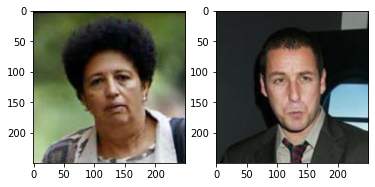

In [22]:
calc_dist_plot("Aicha_El_Ouafi_0001","Adam_Sandler_0001")

#### Comparando imagens da mesma pessoa

Distance: 0.8159214854240417


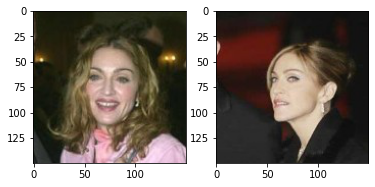

In [24]:
calc_dist_plot("Madonna_0001","Madonna_0002")

Distance: 0.8085755705833435


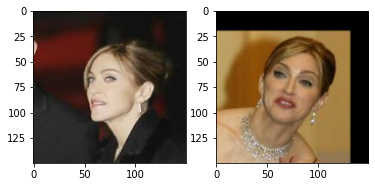

In [26]:
calc_dist_plot("Madonna_0002","Madonna_0003")

#### Comparando a mesma imagem

Distance: 0.0


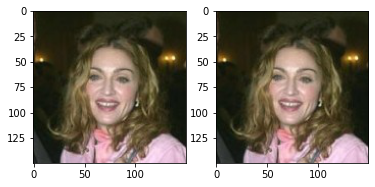

In [25]:
calc_dist_plot("Madonna_0001","Madonna_0001")